In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
df = pd.read_fwf('SALES.txt', colspecs = 'infer', header = None)
df.head()

,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [10]:
df.shape

(36, 2)

In [11]:
df.size

72

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       36 non-null     float64
 1   1       36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes
None


In [16]:
df.columns = ["Advertising", "Sales"]

In [17]:
df.head()

,Advertising,Sales
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [18]:
x = df["Advertising"].values
y = df["Sales"].values

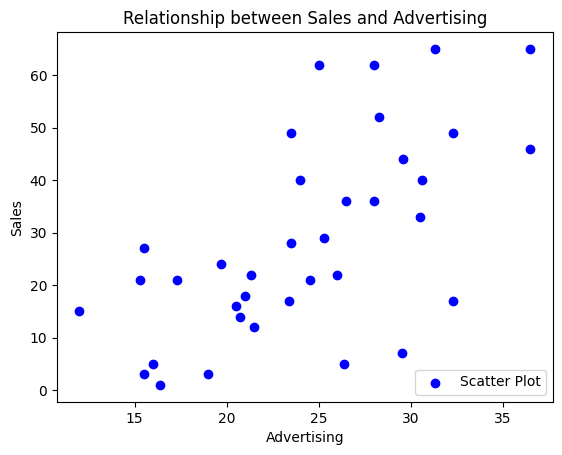

In [23]:
plt.scatter(x,y, color = 'blue', label = 'Scatter Plot')
plt.title("Relationship between Sales and Advertising")
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.legend(loc = 4)
plt.show()

In [24]:
print(x.shape)
print(y.shape)

(36,)
(36,)


In [26]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(x.shape)
print(y.shape)

(36, 1)
(36, 1)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28, 1)
(28, 1)
(8, 1)
(8, 1)


In [32]:
ls = LinearRegression()
ls.fit(x_train, y_train)
y_pred = ls.predict(x_test)

In [34]:
a = ls.coef_
b = ls.intercept_
print("Estimated Model Slope a: ", a)
print("Estimated Model Intercept b: ", b)

Estimated Model Slope a:  [[1.66205855]]
Estimated Model Intercept b:  [-12.45519409]


In [37]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 12.8198


In [39]:
print("R2 score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 score value: 0.5875


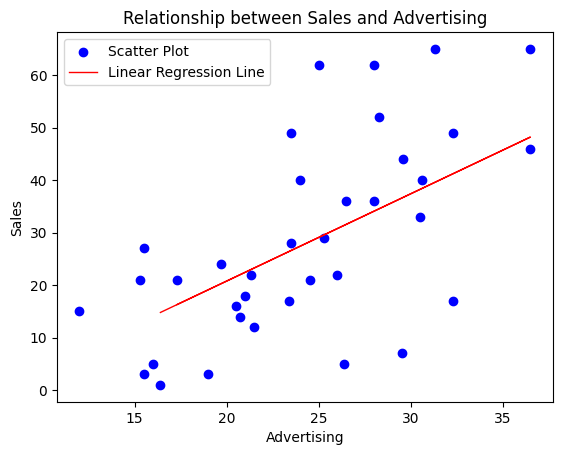

In [46]:
plt.scatter(x,y, color = 'blue', label = 'Scatter Plot')
plt.plot(x_test, y_pred, color = 'red', linewidth = 1, label = 'Linear Regression Line')
plt.title("Relationship between Sales and Advertising")
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.legend(loc = 2)
plt.show()

In [47]:
print("Training set score: {:.4f}".format(ls.score(x_train, y_train)))
print("Test set score: {:.4f}".format(ls.score(x_test, y_test)))

Training set score: 0.3068
Test set score: 0.5875
